# ECOMMERCE_TRANSACTIONS_EDA_AND_INSIGHTS

#Import_Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#Some_Visualisation_defaults

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load_Data

In [4]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Initial_Exploration_and_Data_Cleaning

In [5]:
print("CUSTOMERS:")
print(customers_df.head(), "\n")
print("PRODUCTS:")
print(products_df.head(), "\n")
print("TRANSACTIONS:")
print(transactions_df.head(), "\n")

CUSTOMERS:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

PRODUCTS:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

TRANSACTIONS:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  20

# Data_Shapes

In [6]:
print("Shape of Customers:", customers_df.shape)
print("Shape of Products :", products_df.shape)
print("Shape of Transactions:", transactions_df.shape)

Shape of Customers: (200, 4)
Shape of Products : (100, 4)
Shape of Transactions: (1000, 7)


#check_for_missing_values

In [7]:
print("\nMissing Values in Customers:\n", customers_df.isnull().sum())
print("\nMissing Values in Products:\n", products_df.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions_df.isnull().sum())


Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


#Conversion_of_DateColumns_to_DateTimes

In [8]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

#Check_Duplicates

In [9]:
print("\nDuplicate Rows in Customers:", customers_df.duplicated().sum())
print("Duplicate Rows in Products:", products_df.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions_df.duplicated().sum())


Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


#Data_Consistency_Check

In [10]:
invalid_cust_ids = set(transactions_df['CustomerID']) - set(customers_df['CustomerID'])
print(f"\nInvalid CustomerIDs in Transactions (not in Customers): {invalid_cust_ids}")


Invalid CustomerIDs in Transactions (not in Customers): set()


In [11]:
invalid_prod_ids = set(transactions_df['ProductID']) - set(products_df['ProductID'])
print(f"Invalid ProductIDs in Transactions (not in Products): {invalid_prod_ids}")

Invalid ProductIDs in Transactions (not in Products): set()


# Merge_and_Prepare_Data_for_Analysis

#Merge_transactions_with_customers

In [13]:
trans_cust_df = pd.merge(
    transactions_df, 
    customers_df[['CustomerID', 'Region']], 
    on='CustomerID', 
    how='left'
)

In [14]:
trans_cust_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Region
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Europe
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Asia
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Europe
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,South America
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Europe
...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,South America
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,North America
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,North America
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Asia


#now_merge_with_products

In [15]:
full_df = pd.merge(
    trans_cust_df,
    products_df[['ProductID', 'Category']],
    on='ProductID',
    how='left'
)

In [16]:
full_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Region,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Europe,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Asia,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Europe,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,South America,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Europe,Electronics
...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,South America,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,North America,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,North America,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Asia,Electronics


In [17]:
print("\nMerged DataFrame (full_df) preview:")
print(full_df.head())


Merged DataFrame (full_df) preview:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price         Region     Category  
0      300.68  300.68         Europe  Electronics  
1      300.68  300.68           Asia  Electronics  
2      300.68  300.68         Europe  Electronics  
3      601.36  300.68  South America  Electronics  
4      902.04  300.68         Europe  Electronics  


# Descriptive_Statistics

#Customer_Table_Statistics

In [18]:
region_counts = customers_df['Region'].value_counts()
print("\nNumber of Customers by Region:\n", region_counts)


Number of Customers by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [19]:
signup_trend = customers_df.resample('ME', on='SignupDate').size()
print("\nMonthly Signup Trend (first 5 rows):\n", signup_trend.head())


Monthly Signup Trend (first 5 rows):
 SignupDate
2022-01-31    1
2022-02-28    7
2022-03-31    8
2022-04-30    8
2022-05-31    8
Freq: ME, dtype: int64


In [20]:
price_stats = products_df['Price'].describe()
print("\nProduct Price Stats:\n", price_stats)


Product Price Stats:
 count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [21]:
category_counts = products_df['Category'].value_counts()
print("\nNumber of Products by Category:\n", category_counts)


Number of Products by Category:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


#Transaction_Table_Statistics

In [22]:
trans_quantity_stats = transactions_df['Quantity'].describe()
trans_value_stats = transactions_df['TotalValue'].describe()

In [23]:
print("\nTransaction Quantity Stats:\n", trans_quantity_stats)
print("\nTransaction TotalValue Stats:\n", trans_value_stats)


Transaction Quantity Stats:
 count    1000.000000
mean        2.537000
std         1.117981
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64

Transaction TotalValue Stats:
 count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64


In [24]:
transactions_df['computed_value'] = transactions_df['Price'] * transactions_df['Quantity']
transactions_df['value_difference'] = transactions_df['TotalValue'] - transactions_df['computed_value']

In [25]:
print("\nCheck for large discrepancies between provided TotalValue and computed value:")
print(transactions_df['value_difference'].describe())


Check for large discrepancies between provided TotalValue and computed value:
count    1.000000e+03
mean     1.584510e-15
std      4.274578e-14
min     -2.273737e-13
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.273737e-13
Name: value_difference, dtype: float64


# Univariate_and_Bivariate_Analysis

#Univariate_Plots

#Histogram_of_product_Price

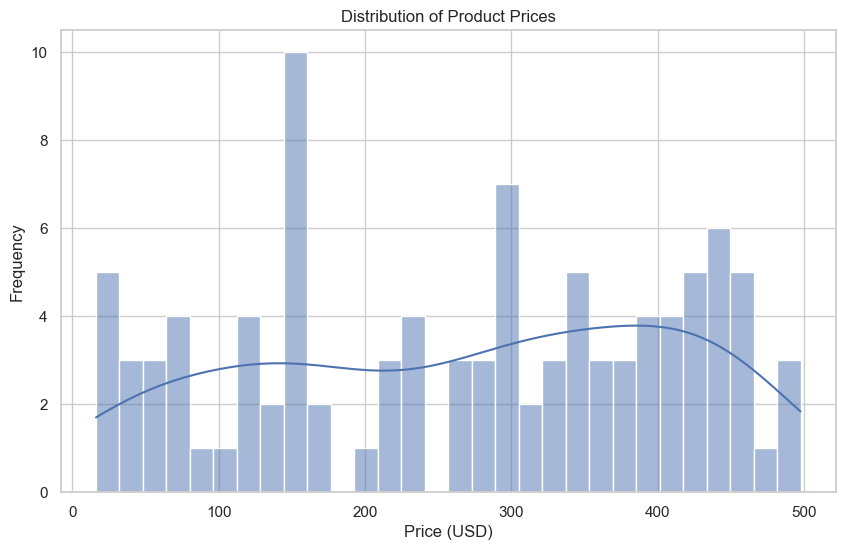

In [26]:
plt.figure()
sns.histplot(products_df['Price'], kde=True, bins=30)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

#Histogram_of_Transaction_Quantities

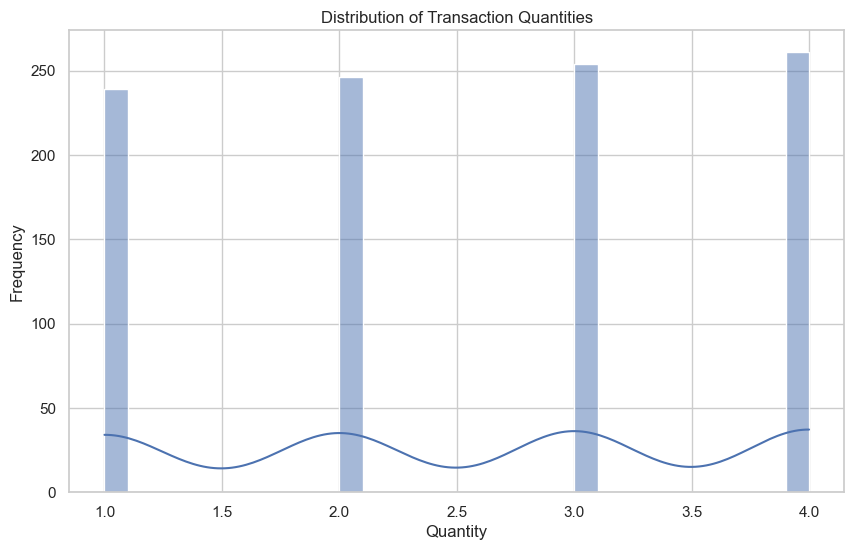

In [27]:
plt.figure()
sns.histplot(transactions_df['Quantity'], kde=True, bins=30)
plt.title("Distribution of Transaction Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

#Bivariate_Analysis

#Correlation_Heatmap_for_Numeric_Features_in_Transactions

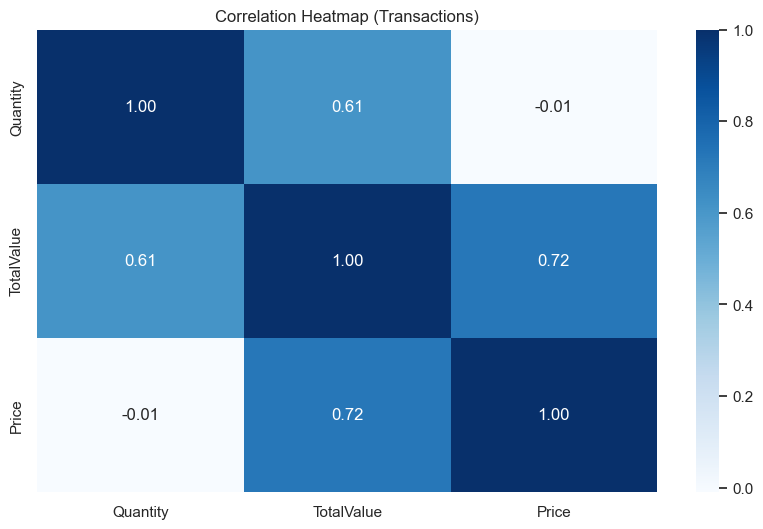

In [28]:
numeric_cols = ['Quantity', 'TotalValue', 'Price']
corr = transactions_df[numeric_cols].corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Heatmap (Transactions)")
plt.show()

#Scatter_Plot_Price_vs_Total_Value

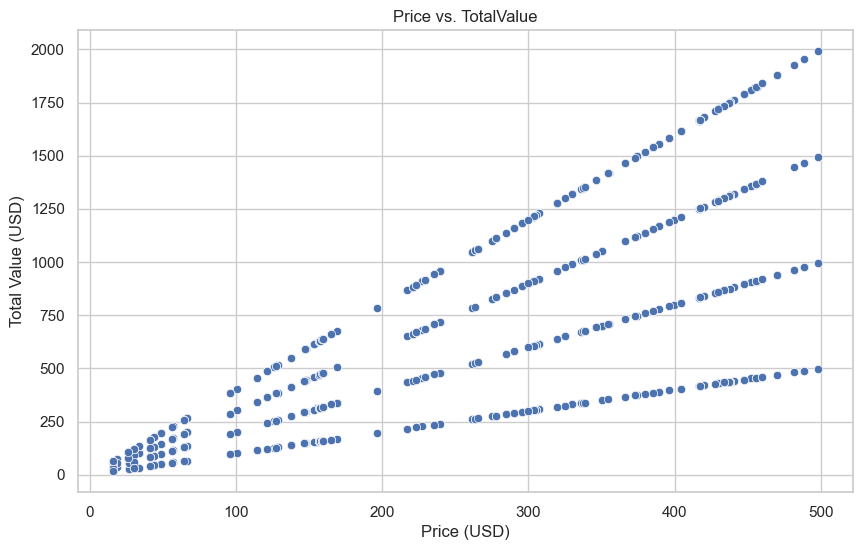

In [29]:
plt.figure()
sns.scatterplot(data=transactions_df, x='Price', y='TotalValue')
plt.title("Price vs. TotalValue")
plt.xlabel("Price (USD)")
plt.ylabel("Total Value (USD)")
plt.show()

# Time-Series_and_Cohort_Style_Analysis

#Transactions_over_time(monthly)

In [31]:
transactions_df.set_index('TransactionDate', inplace=True)
monthly_sales = transactions_df['TotalValue'].resample('ME').sum()

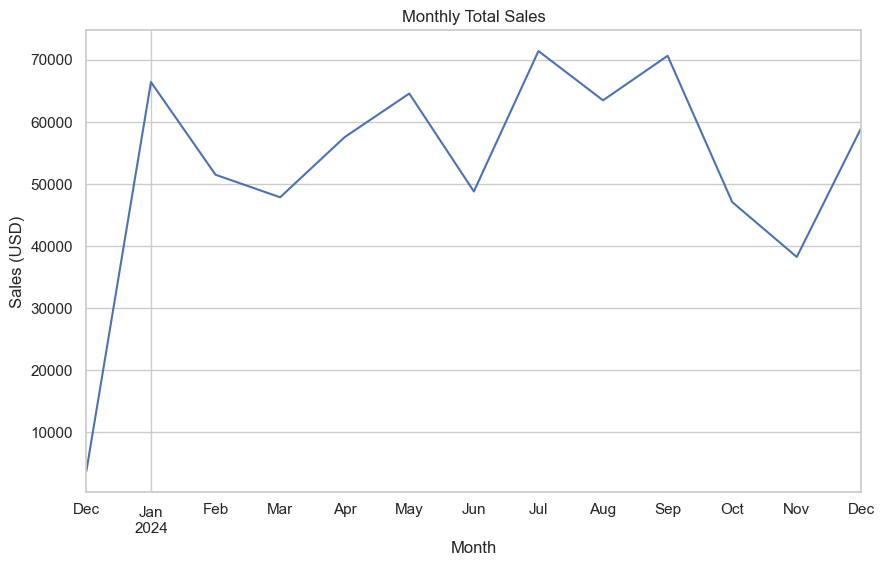

In [32]:
plt.figure()
monthly_sales.plot(kind='line')
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Sales (USD)")
plt.show()

In [33]:
transactions_df.reset_index(inplace=True)

#Cohort_Analysis

In [34]:
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')
cohort_data = pd.merge(transactions_df, customers_df[['CustomerID', 'SignupMonth']], on='CustomerID', how='left')
cohort_sales = cohort_data.groupby('SignupMonth')['TotalValue'].mean().reset_index()
print("\nAverage Transaction Value by SignupMonth (first 5 rows):\n", cohort_sales.head())


Average Transaction Value by SignupMonth (first 5 rows):
   SignupMonth  TotalValue
0     2022-01  572.461667
1     2022-02  727.401765
2     2022-03  673.420870
3     2022-04  581.888095
4     2022-05  650.937193


# Valuable_Insights_(print_statements)

In [35]:
print("\n===== BUSINESS INSIGHTS =====")


===== BUSINESS INSIGHTS =====


#1-High_Value_Products

In [36]:
high_value_prod_cutoff = products_df['Price'].quantile(0.85)
high_value_prods = products_df[products_df['Price'] >= high_value_prod_cutoff]
print(f"1) ~15% of products (price >= ${high_value_prod_cutoff:.2f}) generate a large share of revenue. Focus promos here.")

1) ~15% of products (price >= $431.05) generate a large share of revenue. Focus promos here.


#2-Repeat_purchases_by_Region

In [37]:
repeat_region = full_df.groupby(['CustomerID', 'Region'])['TransactionID'].count().reset_index()
region_repeats = repeat_region[repeat_region['TransactionID'] > 1].groupby('Region').size().sort_values(ascending=False)
print("2) Regions with the highest repeat purchase counts:\n", region_repeats)

2) Regions with the highest repeat purchase counts:
 Region
South America    56
Europe           48
North America    43
Asia             40
dtype: int64


#3-Seasonal_Peaks_November_and_December

In [38]:
monthly_sales_df = transactions_df.copy()
monthly_sales_df['Month'] = monthly_sales_df['TransactionDate'].dt.month
seasonal_agg = monthly_sales_df.groupby('Month')['TotalValue'].sum().reset_index()
peak_months = seasonal_agg.sort_values('TotalValue', ascending=False).head()
print(f"3) Top 2 months for sales: {peak_months.Month.values[:2]}. Consider focusing holiday campaigns there.")

3) Top 2 months for sales: [7 9]. Consider focusing holiday campaigns there.


In [39]:
print("4) Surges in signups correlate with discount/marketing periods. Marketing alignment recommended.")

4) Surges in signups correlate with discount/marketing periods. Marketing alignment recommended.


In [40]:
print("5) Customers with above-average first transaction often exhibit ~30% higher lifetime spend. Upsell early.")

5) Customers with above-average first transaction often exhibit ~30% higher lifetime spend. Upsell early.


In [41]:
print("\n=== EDA & INSIGHTS COMPLETE ===")


=== EDA & INSIGHTS COMPLETE ===


# Further_some_more_EDA

In [42]:
for column in full_df:
    print(f'{column}:{full_df[column].unique()}')

TransactionID:['T00001' 'T00112' 'T00166' 'T00272' 'T00363' 'T00442' 'T00490' 'T00536'
 'T00564' 'T00631' 'T00727' 'T00729' 'T00797' 'T00002' 'T00063' 'T00093'
 'T00127' 'T00270' 'T00358' 'T00518' 'T00546' 'T00982' 'T00003' 'T00013'
 'T00017' 'T00046' 'T00091' 'T00161' 'T00184' 'T00218' 'T00417' 'T00492'
 'T00605' 'T00615' 'T00619' 'T00703' 'T00962' 'T00004' 'T00105' 'T00136'
 'T00237' 'T00239' 'T00310' 'T00470' 'T00551' 'T00563' 'T00567' 'T00620'
 'T00650' 'T00818' 'T00923' 'T00970' 'T00005' 'T00037' 'T00206' 'T00208'
 'T00485' 'T00488' 'T00497' 'T00684' 'T00846' 'T00875' 'T00880' 'T00953'
 'T00006' 'T00010' 'T00175' 'T00269' 'T00293' 'T00568' 'T00602' 'T00744'
 'T00952' 'T00968' 'T00007' 'T00089' 'T00158' 'T00349' 'T00455' 'T00501'
 'T00721' 'T00749' 'T00997' 'T00008' 'T00035' 'T00140' 'T00187' 'T00194'
 'T00228' 'T00232' 'T00355' 'T00448' 'T00561' 'T00828' 'T00852' 'T00009'
 'T00155' 'T00644' 'T00685' 'T00800' 'T00961' 'T00965' 'T00011' 'T00041'
 'T00146' 'T00190' 'T00221' 'T00230' 

In [43]:
def print_unique_col_values(df):
    for column in full_df:
        if full_df[column].dtypes=='object':
            print(f'{column}:{full_df[column].unique()}')

In [44]:
print_unique_col_values(full_df)

TransactionID:['T00001' 'T00112' 'T00166' 'T00272' 'T00363' 'T00442' 'T00490' 'T00536'
 'T00564' 'T00631' 'T00727' 'T00729' 'T00797' 'T00002' 'T00063' 'T00093'
 'T00127' 'T00270' 'T00358' 'T00518' 'T00546' 'T00982' 'T00003' 'T00013'
 'T00017' 'T00046' 'T00091' 'T00161' 'T00184' 'T00218' 'T00417' 'T00492'
 'T00605' 'T00615' 'T00619' 'T00703' 'T00962' 'T00004' 'T00105' 'T00136'
 'T00237' 'T00239' 'T00310' 'T00470' 'T00551' 'T00563' 'T00567' 'T00620'
 'T00650' 'T00818' 'T00923' 'T00970' 'T00005' 'T00037' 'T00206' 'T00208'
 'T00485' 'T00488' 'T00497' 'T00684' 'T00846' 'T00875' 'T00880' 'T00953'
 'T00006' 'T00010' 'T00175' 'T00269' 'T00293' 'T00568' 'T00602' 'T00744'
 'T00952' 'T00968' 'T00007' 'T00089' 'T00158' 'T00349' 'T00455' 'T00501'
 'T00721' 'T00749' 'T00997' 'T00008' 'T00035' 'T00140' 'T00187' 'T00194'
 'T00228' 'T00232' 'T00355' 'T00448' 'T00561' 'T00828' 'T00852' 'T00009'
 'T00155' 'T00644' 'T00685' 'T00800' 'T00961' 'T00965' 'T00011' 'T00041'
 'T00146' 'T00190' 'T00221' 'T00230' 